In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore') 
boston = load_boston()
bostonDF = pd.DataFrame(boston.data , 
columns = boston.feature_names)
bostonDF['PRICE'] = boston.target

In [8]:
bostonDF.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [4]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

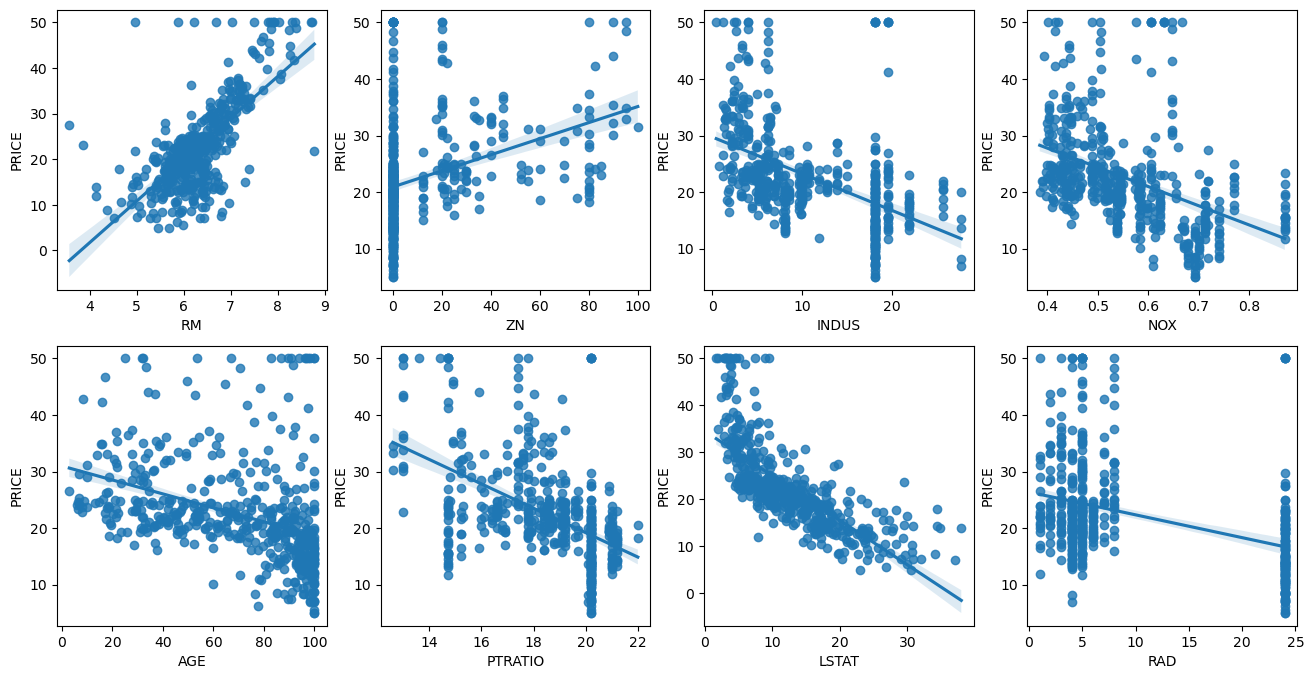

In [9]:
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE',
'PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature , y='PRICE',data=bostonDF , 
    ax=axs[row][col])

In [10]:
bostonDF.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)


In [12]:
X_train.shape, X_test.shape, y_train.shape

((354, 13), (152, 13), (354,))

In [14]:
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
lr_reg.fit(X_train ,y_train )
y_preds = lr_reg.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f} , RMSE : {rmse:.3F}')
print(f'Variance score : {r2_score(y_test, y_preds):.3f}')

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [18]:
lr_reg.predict(X_test.iloc[:1])

array([23.15424087])

In [19]:
y_test.iloc[0]

21.7

In [20]:
lr_reg.predict(X_test.iloc[:1]) - y_test.iloc[0]

array([1.45424087])

In [22]:
print('절편 값:',lr_reg.intercept_)
print('회귀 계수값:', np.round(lr_reg.coef_, 1))

절편 값: 40.99559517216417
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [23]:
from sklearn.model_selection import cross_val_score

lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5 )


rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print('5 folds 의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores :', np.round(rmse_scores, 2))
print(f'5 folds 의 평균 RMSE : {avg_rmse:.3f}')


5 folds 의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 RMSE scores : [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 RMSE : 5.829


In [51]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)
bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']

X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)


In [26]:
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, 
scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', 
np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))


 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518 


In [28]:
alphas = [0.1, 1, 10, 100, 1000]
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    neg_mse_scores = cross_val_score(ridge, X_data, y_target,
    scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print(f'alpha {alpha} 일 때 5 folds 의 평균 RMSE : {avg_rmse:.3f}')

alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330
alpha 1000 일 때 5 folds 의 평균 RMSE : 5.598


In [32]:
ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)
mean_squared_error(y_test, pred)

19.36188748483845

In [33]:
from sklearn.linear_model import Lasso, ElasticNet
def get_linear_reg_eval(model_name, params=None, X_data_n = None, y_target_n = None,
                        verbose = True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose: print('######', model_name, '######')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha = param)
        elif model_name == 'Lasso': model = Lasso(alpha = param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha = param, l1_ratio = 0.7)
            
            
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴트 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))
        model.fit(X_data_n, y_target_n)
        
        if return_coeff:
            coeff = pd.Series(data = model.coef_, index = X_data_n.columns)
            colname = 'alpha' + str(param)
            coeff_df[colname] = coeff
    return coeff_df


In [35]:
lasso_alphas = [0.01, 0.05, 0.1, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params = lasso_alphas, 
                                    X_data_n=X_data, y_target_n=y_target)


###### Lasso ######
alpha 0.01일 때 5 폴트 세트의 평균 RMSE: 5.740
alpha 0.05일 때 5 폴트 세트의 평균 RMSE: 5.628
alpha 0.1일 때 5 폴트 세트의 평균 RMSE: 5.615
alpha 1일 때 5 폴트 세트의 평균 RMSE: 5.776
alpha 3일 때 5 폴트 세트의 평균 RMSE: 6.189


In [36]:
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params = elastic_alphas, 
                                      X_data_n=X_data, y_target_n=y_target)


###### ElasticNet ######
alpha 0.07일 때 5 폴트 세트의 평균 RMSE: 5.542
alpha 0.1일 때 5 폴트 세트의 평균 RMSE: 5.526
alpha 0.5일 때 5 폴트 세트의 평균 RMSE: 5.467
alpha 1일 때 5 폴트 세트의 평균 RMSE: 5.597
alpha 3일 때 5 폴트 세트의 평균 RMSE: 6.068


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
cancer = load_breast_cancer()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 평균을 0, 표준편차 1   
scaler = StandardScaler()
# scaler.fit(cancer.data)
# data_scaled = scaler.transform(cancer.data)
data_scaled = scaler.fit_transform(cancer.data)
X_train , X_test, y_train , y_test = train_test_split(data_scaled,
cancer.target, test_size=0.3, random_state=0)

In [41]:
cancer.data[:1]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01]])

In [42]:
data_scaled[:1]

array([[ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
         3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
         2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
         1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
         1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
         2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461]])

In [37]:
from sklearn.metrics import accuracy_score, roc_auc_score
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, lr_preds):.3f}, \
roc_auc:{roc_auc_score(y_test , lr_preds):.3f}')

accuracy: 0.977, roc_auc:0.972


In [44]:
X_train , X_test, y_train , y_test = train_test_split(cancer.data,
                        cancer.target, test_size=0.3, random_state=0)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, lr_preds):.3f}, \
roc_auc:{roc_auc_score(y_test , lr_preds):.3f}')

accuracy: 0.953, roc_auc:0.956


In [45]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 0 ~ 1 값으로 바꾼다
scaler = MinMaxScaler()
# scaler.fit(cancer.data)
# data_scaled = scaler.transform(cancer.data)
data_scaled = scaler.fit_transform(cancer.data)
X_train , X_test, y_train , y_test = train_test_split(data_scaled,
cancer.target, test_size=0.3, random_state=0)

In [46]:
cancer.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [47]:
data_scaled[0]

array([0.52103744, 0.0226581 , 0.54598853, 0.36373277, 0.59375282,
       0.7920373 , 0.70313964, 0.73111332, 0.68636364, 0.60551811,
       0.35614702, 0.12046941, 0.3690336 , 0.27381126, 0.15929565,
       0.35139844, 0.13568182, 0.30062512, 0.31164518, 0.18304244,
       0.62077552, 0.14152452, 0.66831017, 0.45069799, 0.60113584,
       0.61929156, 0.56861022, 0.91202749, 0.59846245, 0.41886396])

In [48]:
from sklearn.metrics import accuracy_score, roc_auc_score
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, lr_preds):.3f}, \
roc_auc:{roc_auc_score(y_test , lr_preds):.3f}')

accuracy: 0.953, roc_auc:0.940


In [50]:
bostonDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [53]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=500)

rf_reg.fit(X_train, y_train)
pred = rf_reg.predict(X_test)
np.sqrt(mean_squared_error(y_test, pred))

0.18279032822763697

In [54]:
import matplotlib.pyplot as plt

bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100, 
random_state=0)
print(bostonDF_sample.shape)

(100, 2)


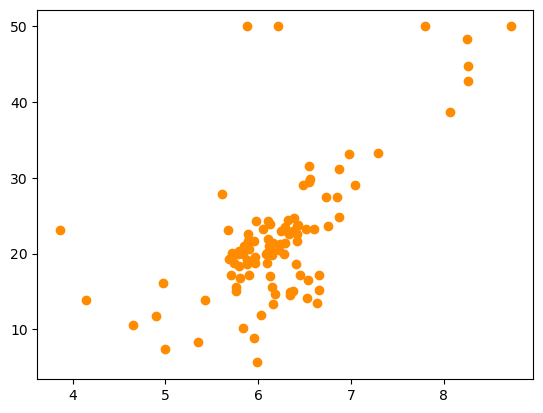

In [55]:
plt.figure()
plt.scatter(bostonDF_sample.RM , bostonDF_sample.PRICE, c="darkorange")

In [58]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

lr_reg = LinearRegression()
dt_reg = DecisionTreeRegressor(max_depth=2)

X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

lr_reg.fit(X_feature, y_target)
dt_reg.fit(X_feature, y_target)


DecisionTreeRegressor(max_depth=2)

In [59]:
pred_lr = lr_reg.predict(X_test)
pred_dt = dt_reg.predict(X_test)

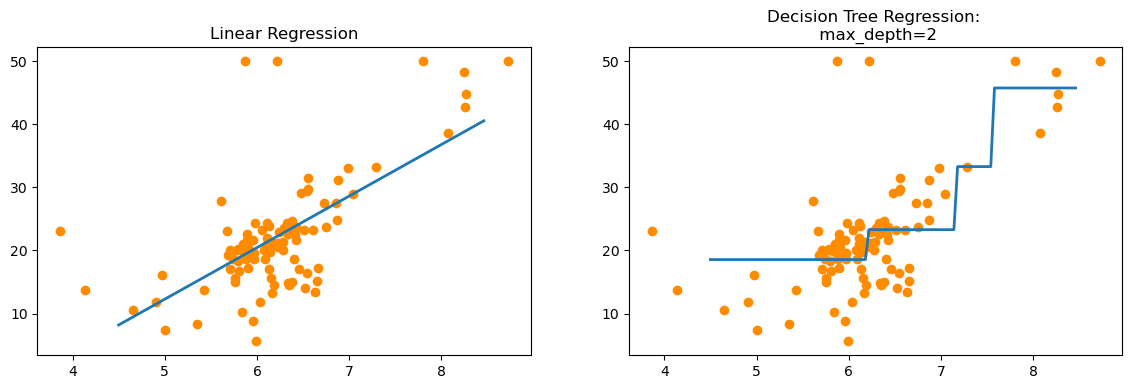

In [60]:
fig , (ax1, ax2) = plt.subplots(figsize=(14,4), ncols=2)

ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr,label="linear", linewidth=2 )

ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_dt, label="max_depth:3", linewidth=2 )


In [62]:
pred_dt

array([18.55555556, 18.55555556, 18.55555556, 18.55555556, 18.55555556,
       18.55555556, 18.55555556, 18.55555556, 18.55555556, 18.55555556,
       18.55555556, 18.55555556, 18.55555556, 18.55555556, 18.55555556,
       18.55555556, 18.55555556, 18.55555556, 18.55555556, 18.55555556,
       18.55555556, 18.55555556, 18.55555556, 18.55555556, 18.55555556,
       18.55555556, 18.55555556, 18.55555556, 18.55555556, 18.55555556,
       18.55555556, 18.55555556, 18.55555556, 18.55555556, 18.55555556,
       18.55555556, 18.55555556, 18.55555556, 18.55555556, 18.55555556,
       18.55555556, 18.55555556, 18.55555556, 23.2974359 , 23.2974359 ,
       23.2974359 , 23.2974359 , 23.2974359 , 23.2974359 , 23.2974359 ,
       23.2974359 , 23.2974359 , 23.2974359 , 23.2974359 , 23.2974359 ,
       23.2974359 , 23.2974359 , 23.2974359 , 23.2974359 , 23.2974359 ,
       23.2974359 , 23.2974359 , 23.2974359 , 23.2974359 , 23.2974359 ,
       23.2974359 , 23.2974359 , 33.3       , 33.3       , 33.3 

In [63]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, 
columns = boston.feature_names)
bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1,inplace=False)
X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)


In [67]:
dt_reg = DecisionTreeRegressor()

dt_reg.fit(X_train, y_train)
pred_dt = dt_reg.predict(X_test)

np.sqrt(mean_squared_error(y_test, pred_dt))

3.4551544256752345